In [1]:
import pandas as pd
import upath
import extras

In [2]:
# configure logger
import logging

logger = logging.getLogger(__name__)
handler = logging.StreamHandler()
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
handler.setFormatter(formatter)
logger.handlers = [handler]
logger.setLevel("DEBUG")

In [3]:
# reload extras
import importlib
importlib.reload(extras)

<module 'extras' from '/home/jupyter/deconv/analysis/cibersortx/4_both_grid/extras.py'>

In [4]:
# path_root = upath.UPath("gs://liulab/differential_composition_and_expression/20230224_07h54m40s")
path_root = upath.UPath('gs://liulab/differential_composition_and_expression/20230224_07h54m40s')
# print(extras.get_parquet_paths(path_root))

In [5]:
df_gene_stats = extras.load_gene_stats(path_root)

## ROC (TPR, FPR)

In [6]:
df_roc = extras.calculate_roc(df_gene_stats)
df_roc

fpr   tpr  thresholds
malignant_means log2_fc run_id                                 
0.71,0.71       -1.50   00     0     0.000000  0.00    4.120233
                               1     0.000063  0.00    3.120233
                               2     0.001441  0.00    2.276179
                               3     0.001566  0.00    2.266945
                               4     0.002944  0.00    2.104293
...                                       ...   ...         ...
0.55,0.85       1.50    09     1713  0.843200  0.99    0.001233
                               1714  0.843200  1.00    0.001218
                               1715  0.843450  1.00    0.001196
                               1716  0.845580  1.00    0.001196
                               1717  1.000000  1.00   -0.000000

[768340 rows x 3 columns]

In [7]:
fig = extras.plot_roc(df_roc)

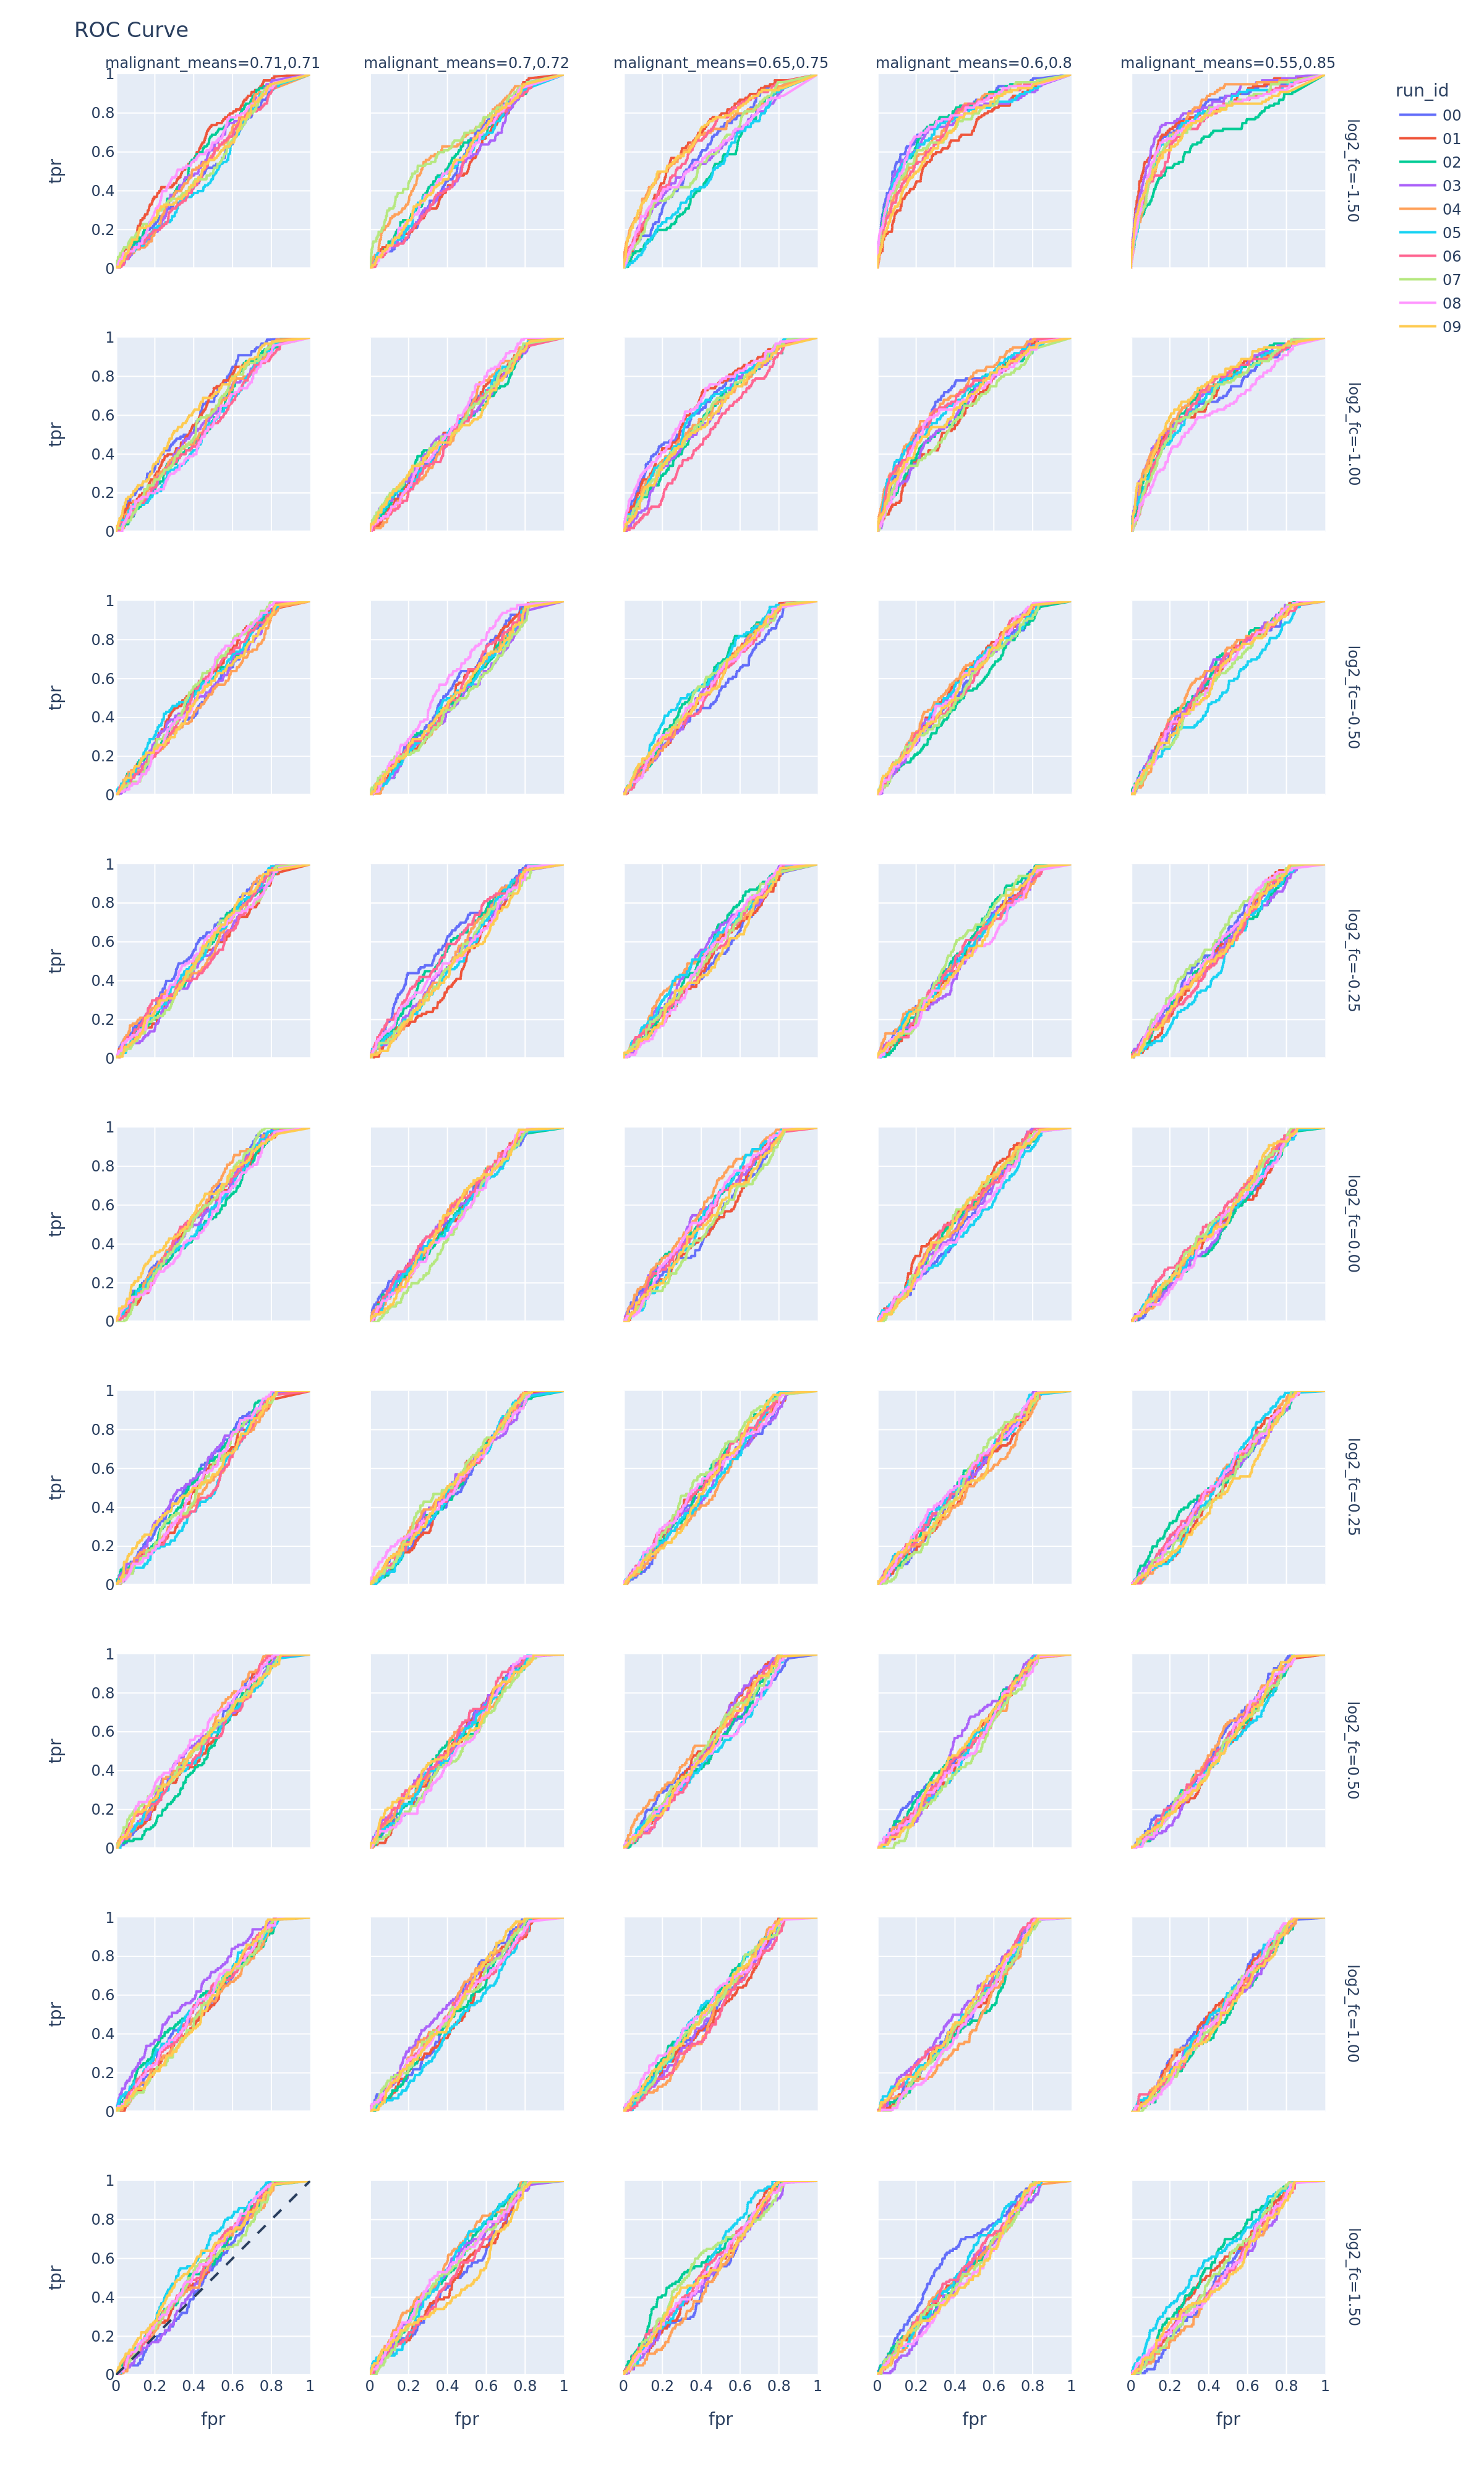

In [8]:
fig.update_layout(width=1200, height=2000)
fig.show(renderer="png", scale=2)

## precision and recall

In [9]:
df_prc = extras.calculate_precision_and_recall(df_gene_stats)
df_prc

precision  recall  thresholds
malignant_means log2_fc run_id                                    
0.71,0.71       -1.50   00     0      0.006225     1.0    0.000758
                               1      0.006226     1.0    0.001181
                               2      0.006226     1.0    0.001431
                               3      0.006227     1.0    0.001689
                               4      0.006227     1.0    0.001791
...                                        ...     ...         ...
0.55,0.85       1.50    09     6014   0.000000     0.0    0.997249
                               6015   0.000000     0.0    0.997249
                               6016   0.000000     0.0    0.997250
                               6017   0.000000     0.0    1.000000
                               6018   1.000000     0.0         inf

[2506372 rows x 3 columns]

In [10]:
fig = extras.plot_precision_recall_curve(df_prc)

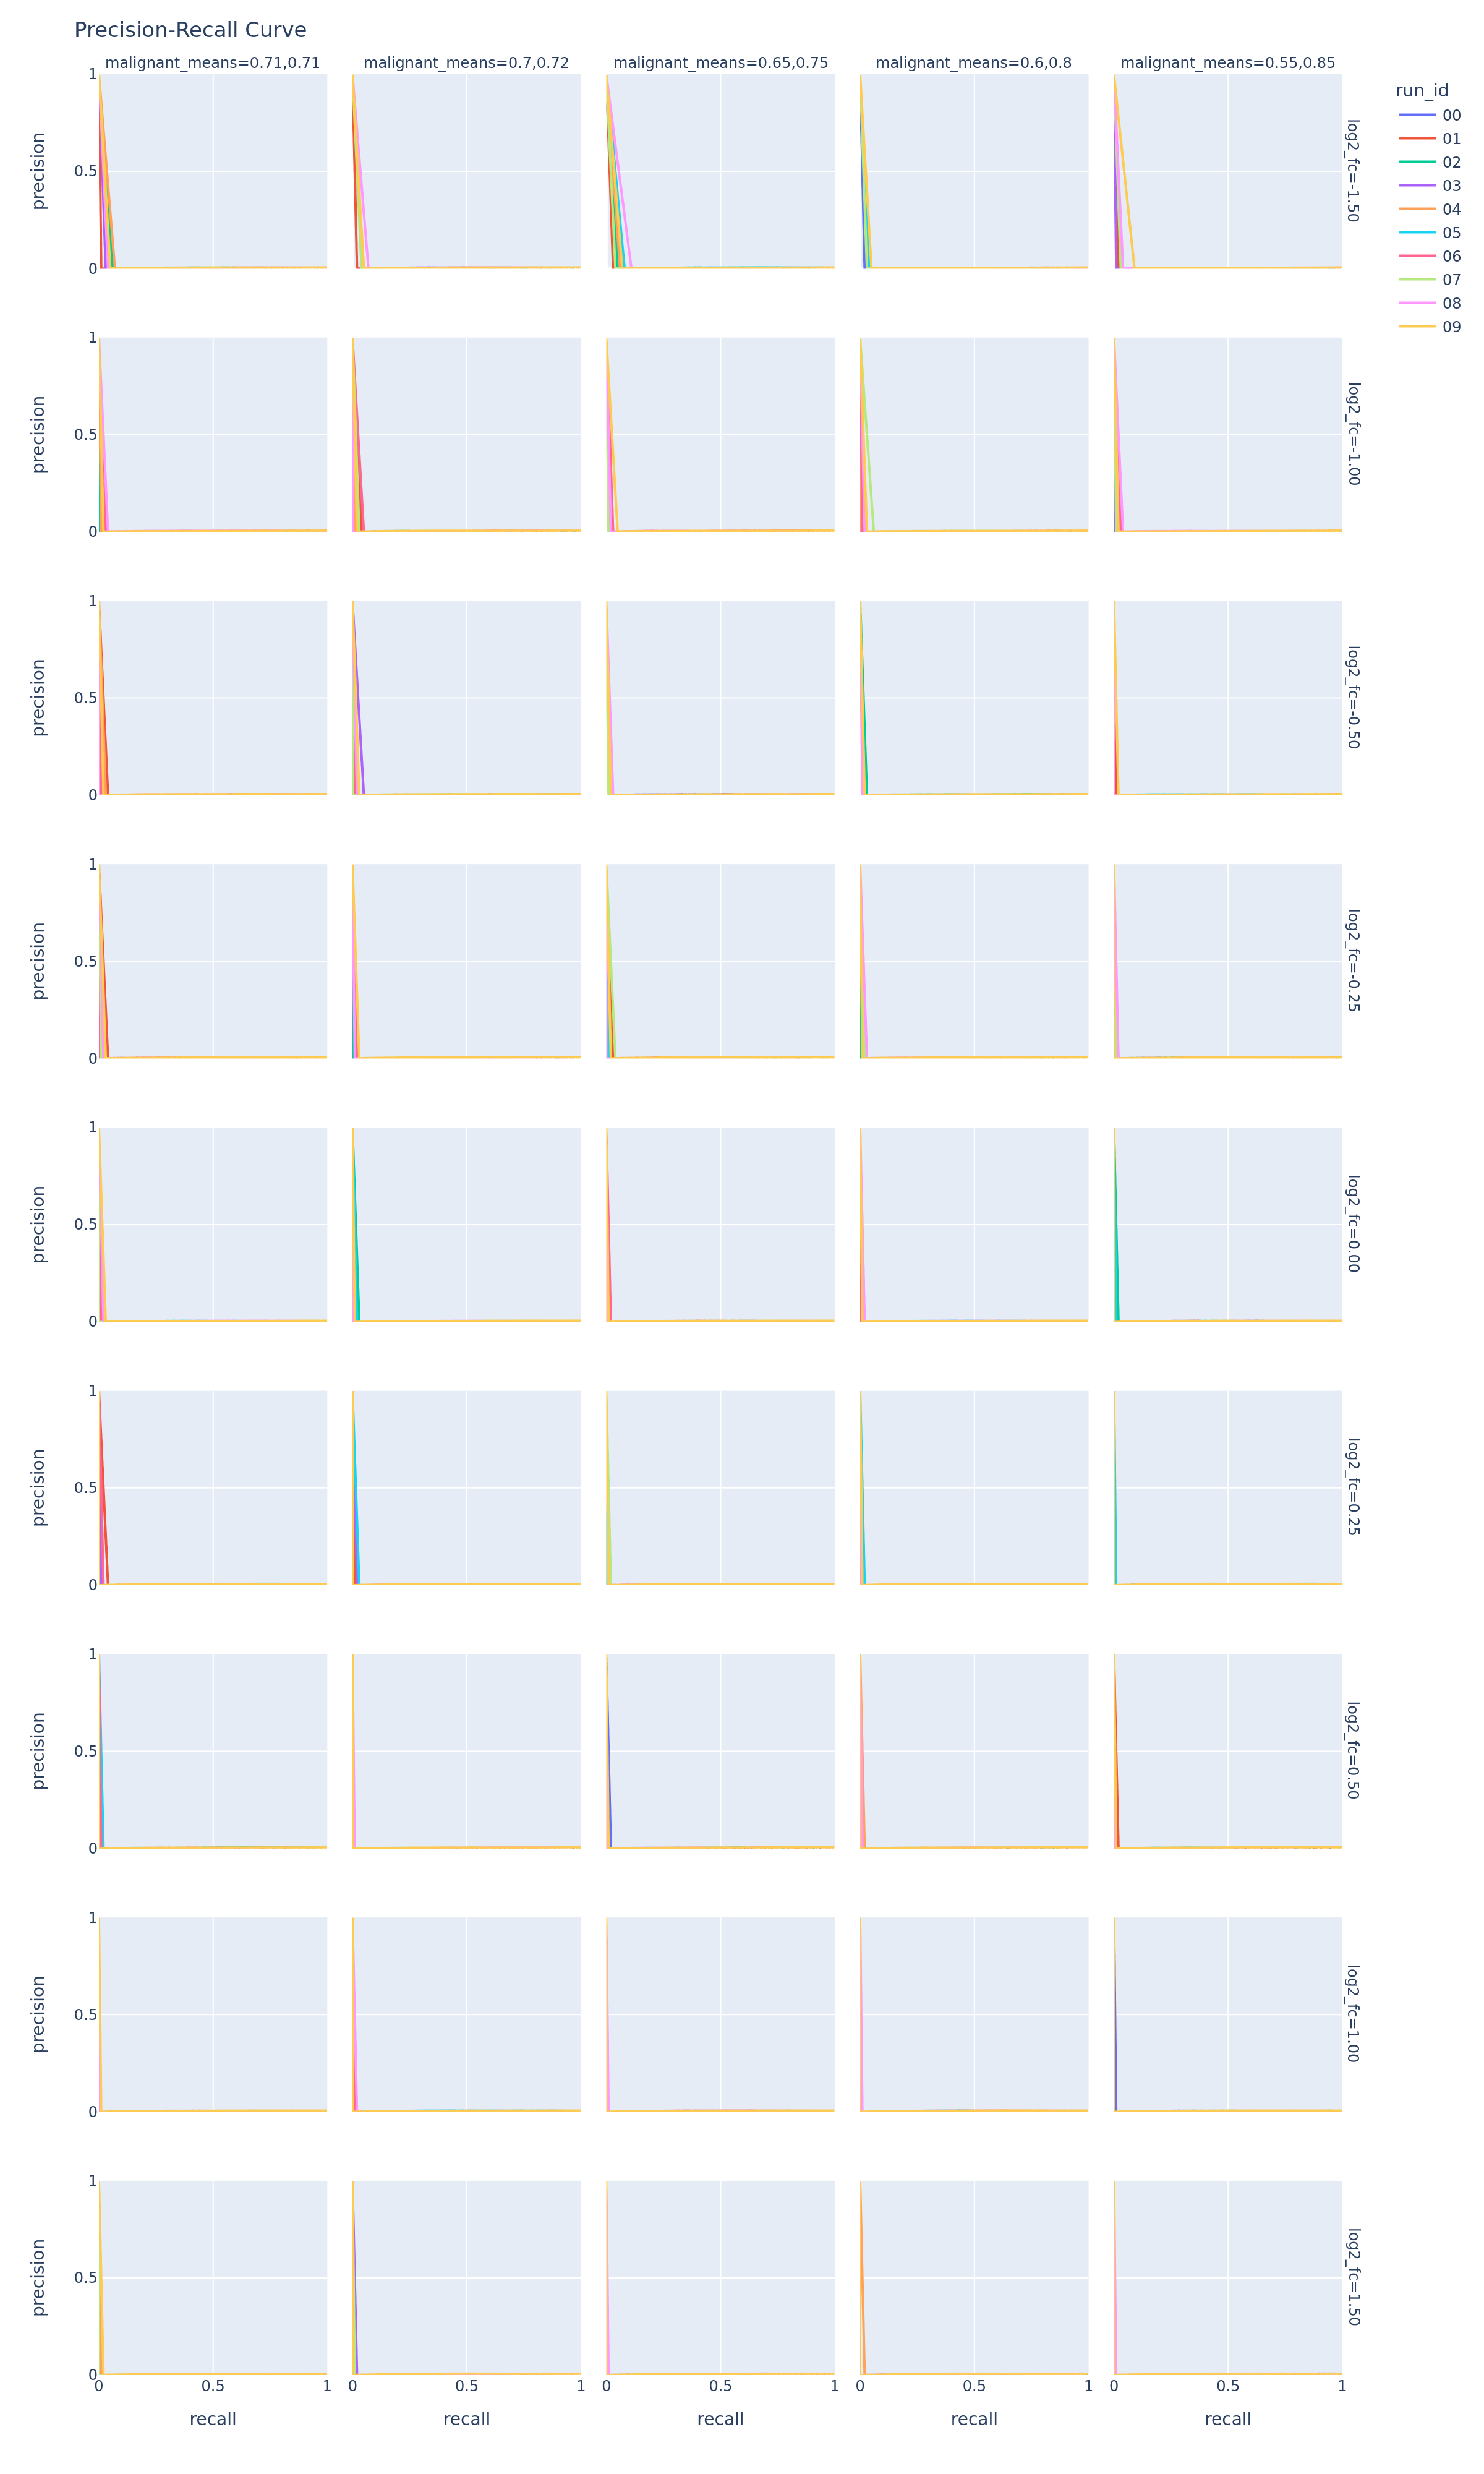

In [11]:
fig.update_layout(width=1200, height=2000)
fig.show(renderer="png", scale=2)
